## Problem Statement



### Context

A dataset of Shark Tank episodes is made available. It contains 495 entrepreneurs making their pitch to the VC sharks. You will ONLY use “Description” column for the initial text mining exercise.

### Data Description

Deal column suggests the companies secured business deal or not from Sharks
Description suggests what is pitch the entrepreneurs presented to the VC shark

## **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [150]:
!pip install wordcloud

In [151]:
# Import necessary libraries
import re, string, unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [152]:
# Download necessary NLTK packages
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Use only if required

In [154]:
# Define necessary functions
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stopwords.words('english')]

## Importing Dataset

In [156]:
deals=pd.read_csv(r'C:\Users\admin\Desktop\Aaryani\Great Learning\6th Month\Extended Project\Dataset.csv') #Importing the data

In [157]:
data=deals.copy()

In [158]:
pd. __version__

'2.0.3'

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [161]:
data.head() ##  Complete the code to view top 5 rows of the data

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [162]:
data.tail() ##  Complete the code to view top 5 rows of the data

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
490,True,Zoom Interiors is a virtual service for interi...,28,Online Services,"Beatrice Fischel-Bock, Madeine Fraser & Lizzie...","Philadelphia, PA",https://zoominteriors.com,100000,20,500000,6,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Zoom Interiors,6-28,False
491,True,Spikeball started out as a casual outdoors gam...,29,Toys and Games,Chris Ruder,"Chicago, IL",http://spikeball.com,500000,10,5000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Spikeball,6-29,False
492,True,Shark Wheel is out to literally reinvent the w...,29,Outdoor Recreation,David Patrick and Zack Fleishman,"Lake Forest, CA",http://www.sharkwheel.com,100000,5,2000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Shark Wheel,6-29,True
493,False,Adriana Montano wants to open the first Cat Ca...,29,Entertainment,Adriana Montano,"Boca Raton, FL",http://gatocafeflorida.com,100000,20,500000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Gato Cafe,6-29,False
494,True,"Sway Motorsports makes a three-wheeled, all-el...",29,Automotive,Joe Wilcox,"Palo Alto, CA",http://www.swaymotorsports.com,300000,10,3000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Sway Motorsports,6-29,False


### Shape of the Dataset

In [164]:
data.shape

(495, 19)

### Type of data in the Dataset

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 457 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [167]:
# Drop rows with missing values and drop duplicate
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

## Data Preparation and Exploratory Data Analysis

### 1. Pick out the Deal (Dependent Variable) and Description columns into a separate data frame

In [170]:
df2=data[["deal","description"]]
df2

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...
...,...,...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...
493,False,Adriana Montano wants to open the first Cat Ca...


### 2. Create two corpora ( data frames which has description and deal columns ) one with those who secured a Deal, the other with those who did not secure a deal

Corpora 1 : deal secured

In [173]:
deal_true = df2[df2['deal'] == True]  
deal_true

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
5,True,One of the first entrepreneurs to pitch on Sha...
12,True,A line of books written to help children find ...
16,True,Coverplay is a slipcover for children's play y...
...,...,...
489,True,SynDaver Labs makes synthetic body parts for u...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...


corpora2: deal not secured

In [175]:
deal_false = df2[df2['deal'] == False]  
deal_false

,deal,description
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
6,False,A mixed martial arts clothing line looking to ...
7,False,"Attach Noted is a detachable ""arm"" that holds ..."
8,False,A safety device for seatbelts. It prevents the...
...,...,...
482,False,Buck Mason makes high-quality men's clothing i...
484,False,"Frameri answers the question, ""Why aren't your..."
485,False,The Paleo Diet Bar is a nutrition bar that is ...
488,False,Sunscreen Mist adds another point of access fo...


##### Drop deal column as it is no longer required

In [177]:
deal_secured=deal_true.drop("deal",axis=1)
deal_secured.head()

,description
1,Retail and wholesale pie factory with two reta...
2,Ava the Elephant is a godsend for frazzled par...
5,One of the first entrepreneurs to pitch on Sha...
12,A line of books written to help children find ...
16,Coverplay is a slipcover for children's play y...


In [178]:
deal_notsecured=deal_false.drop("deal",axis=1)
deal_notsecured.head()

,description
3,"Organizing, packing, and moving services deliv..."
4,Interactive media centers for healthcare waiti...
6,A mixed martial arts clothing line looking to ...
7,"Attach Noted is a detachable ""arm"" that holds ..."
8,A safety device for seatbelts. It prevents the...


### 3. Find the number of characters in each row of description column for the corpus which secured the deal

In [180]:
deal_secured['char_count'] = deal_secured["description"].apply(lambda x: len(str(x)))
deal_notsecured['char_count'] = deal_notsecured["description"].apply(lambda x: len(str(x)))
sum_secured=deal_secured["char_count"].sum()
sum_notsecured=deal_notsecured["char_count"].sum()
print("True Corpus",sum_secured)
print("False Corpus",sum_notsecured)

True Corpus 50302
False Corpus 34899


## Text Preprocessing

- We'll be doing text preprocessing on the corpus for those who secured the deal

### Removal of http links

In [184]:
import re

# Define a function to remove HTTP links
def remove_http_links(text):
    return re.sub(r'http\S+', '', text)

# Apply the function to the 'description' column for both dataframes
deal_secured['description'] = deal_secured['description'].apply(remove_http_links)
deal_notsecured['description'] = deal_notsecured['description'].apply(remove_http_links)

# Display the first few rows to verify the changes
print(deal_secured.head())
print(deal_notsecured.head())

                                          description  char_count
1   Retail and wholesale pie factory with two reta...          73
2   Ava the Elephant is a godsend for frazzled par...         244
5   One of the first entrepreneurs to pitch on Sha...         365
12  A line of books written to help children find ...          57
16  Coverplay is a slipcover for children's play y...         722
                                         description  char_count
3  Organizing, packing, and moving services deliv...          68
4  Interactive media centers for healthcare waiti...         112
6  A mixed martial arts clothing line looking to ...         110
7  Attach Noted is a detachable "arm" that holds ...          91
8  A safety device for seatbelts. It prevents the...         111


#### Pre processing: De-contraction of words

In [186]:
!pip install contractions 
# Import the contractions library
import contractions

# Define the function to replace contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the operation over all the rows of the 'description' column of the dataframe
for i, row in deal_secured.iterrows():
    content = deal_secured.at[i, 'description']
    cleancontent = replace_contractions(content)
    deal_secured.at[i,'description'] = cleancontent  # Corrected 'data' to 'deal_secured' 

# Display the first few rows to confirm the changes
deal_secured.head()

,description,char_count
1,Retail and wholesale pie factory with two reta...,73
2,Ava the Elephant is a godsend for frazzled par...,244
5,One of the first entrepreneurs to pitch on Sha...,365
12,A line of books written to help children find ...,57
16,Coverplay is a slipcover for children's play y...,722


In [193]:
 for i, row in deal_notsecured.iterrows():
    content = deal_notsecured.at[i, 'description']
    cleancontent = replace_contractions(content)
    deal_notsecured.at[i,'description'] = cleancontent  # Corrected 'data' to 'deal_notsecured'  

deal_notsecured.head()

,description,char_count
3,"Organizing, packing, and moving services deliv...",68
4,Interactive media centers for healthcare waiti...,112
6,A mixed martial arts clothing line looking to ...,110
7,"Attach Noted is a detachable ""arm"" that holds ...",91
8,A safety device for seatbelts. It prevents the...,111


In [198]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Pre Processing : Removal of number

In [209]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', str(text))
  return text

deal_secured['description'] = deal_secured['description'].apply(lambda x: remove_numbers(x))
deal_secured['char'] = deal_secured["description"].apply(lambda x: len(str(x)))
deal_secured.head()

,description,char_count,char
1,Retail and wholesale pie factory with two reta...,73,73
2,Ava the Elephant is a godsend for frazzled par...,244,244
5,One of the first entrepreneurs to pitch on Sha...,365,362
12,A line of books written to help children find ...,57,57
16,Coverplay is a slipcover for children's play y...,722,723


In [210]:
deal_notsecured['description'] = deal_notsecured['description'].apply(lambda x: remove_numbers(x))
deal_notsecured['char'] = deal_notsecured["description"].apply(lambda x: len(str(x)))
deal_notsecured.head()

,description,char_count,char
3,"Organizing, packing, and moving services deliv...",68,68
4,Interactive media centers for healthcare waiti...,112,112
6,A mixed martial arts clothing line looking to ...,110,110
7,"Attach Noted is a detachable ""arm"" that holds ...",91,91
8,A safety device for seatbelts. It prevents the...,111,111


### Tokenization

In [212]:
deal_secured['description'] = deal_secured.apply(lambda row: nltk.sent_tokenize(row['description']), axis=1) # Tokenization of data
deal_secured['char_token'] = deal_secured["description"].apply(lambda x: len(str(x)))
deal_secured.head()

,description,char_count,char,char_token
1,[Retail and wholesale pie factory with two ret...,73,73,77
2,[Ava the Elephant is a godsend for frazzled pa...,244,244,251
5,[One of the first entrepreneurs to pitch on Sh...,365,362,369
12,[A line of books written to help children find...,57,57,61
16,[Coverplay is a slipcover for children's play ...,722,723,745


In [213]:
deal_notsecured['description'] = deal_notsecured.apply(lambda row: nltk.sent_tokenize(row['description']), axis=1) # Tokenization of data
deal_notsecured['char_token'] = deal_notsecured["description"].apply(lambda x: len(str(x)))
deal_notsecured.head()

,description,char_count,char,char_token
3,"[Organizing, packing, and moving services deli...",68,68,72
4,[Interactive media centers for healthcare wait...,112,112,116
6,[A mixed martial arts clothing line looking to...,110,110,114
7,"[Attach Noted is a detachable ""arm"" that holds...",91,91,95
8,"[A safety device for seatbelts., It prevents t...",111,111,118


### Lowercase

- Lowercasing ALL your text data, although commonly overlooked, is one of the simplest and most effective form of text preprocessing. It is applicable to most text mining and NLP problems and can help in cases where your dataset is not very large and significantly helps with consistency of expected output.

- An example where lowercasing is very useful is for search. Imagine, you are looking for documents containing “usa”. However, no results were showing up because “usa” was indexed as “USA”.

In [216]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [217]:
deal_secured['description' ] = deal_secured['description' ].apply(lambda x: to_lowercase(x))
deal_secured['char_lower'] = deal_secured["description"].apply(lambda x: len(str(x)))
deal_secured.head()

,description,char_count,char,char_token,char_lower
1,[retail and wholesale pie factory with two ret...,73,73,77,77
2,[ava the elephant is a godsend for frazzled pa...,244,244,251,251
5,[one of the first entrepreneurs to pitch on sh...,365,362,369,369
12,[a line of books written to help children find...,57,57,61,61
16,[coverplay is a slipcover for children's play ...,722,723,745,745


In [218]:
deal_notsecured['description' ] = deal_notsecured['description' ].apply(lambda x: to_lowercase(x))
deal_notsecured['char_lower'] = deal_notsecured["description"].apply(lambda x: len(str(x)))
deal_notsecured.head()

,description,char_count,char,char_token,char_lower
3,"[organizing, packing, and moving services deli...",68,68,72,72
4,[interactive media centers for healthcare wait...,112,112,116,116
6,[a mixed martial arts clothing line looking to...,110,110,114,114
7,"[attach noted is a detachable ""arm"" that holds...",91,91,95,95
8,"[a safety device for seatbelts., it prevents t...",111,111,118,118


### Removal of punctuation

In [220]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [221]:
deal_secured['description'] = deal_secured['description'].apply(lambda x: remove_punctuation(x))
deal_secured['char_punc'] = deal_secured["description"].apply(lambda x: len(str(x)))
deal_secured.head()

,description,char_count,char,char_token,char_lower,char_punc
1,[retail and wholesale pie factory with two ret...,73,73,77,77,76
2,[ava the elephant is a godsend for frazzled pa...,244,244,251,251,249
5,[one of the first entrepreneurs to pitch on sh...,365,362,369,369,356
12,[a line of books written to help children find...,57,57,61,61,60
16,[coverplay is a slipcover for childrens play y...,722,723,745,745,726


In [222]:
deal_notsecured['description'] = deal_notsecured['description'].apply(lambda x: remove_punctuation(x))
deal_notsecured['char_punc'] = deal_notsecured["description"].apply(lambda x: len(str(x)))
deal_notsecured.head()

,description,char_count,char,char_token,char_lower,char_punc
3,[organizing packing and moving services delive...,68,68,72,72,69
4,[interactive media centers for healthcare wait...,112,112,116,116,115
6,[a mixed martial arts clothing line looking to...,110,110,114,114,112
7,[attach noted is a detachable arm that holds p...,91,91,95,95,91
8,"[a safety device for seatbelts, it prevents th...",111,111,118,118,116


### Removal of stopwords

- Stop words are a set of commonly used words in a language.

- Examples of stop words in English are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.

In [225]:
import nltk
nltk.download('stopwords')      #Downloading nltk corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [226]:
stopwords =stopwords.words('english')

In [229]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [231]:
deal_secured['description'] = deal_secured['description'].apply(lambda x: remove_stopwords(x))
deal_secured['char_stop'] = deal_secured["description"].apply(lambda x: len(str(x)))
deal_secured.head()

,description,char_count,char,char_token,char_lower,char_punc,char_stop
1,[retail and wholesale pie factory with two ret...,73,73,77,77,76,76
2,[ava the elephant is a godsend for frazzled pa...,244,244,251,251,249,249
5,[one of the first entrepreneurs to pitch on sh...,365,362,369,369,356,356
12,[a line of books written to help children find...,57,57,61,61,60,60
16,[coverplay is a slipcover for childrens play y...,722,723,745,745,726,726


In [232]:
deal_notsecured['description'] = deal_notsecured['description'].apply(lambda x: remove_stopwords(x))
deal_notsecured['char_stop'] = deal_notsecured["description"].apply(lambda x: len(str(x)))
deal_notsecured.head()

,description,char_count,char,char_token,char_lower,char_punc,char_stop
3,[organizing packing and moving services delive...,68,68,72,72,69,69
4,[interactive media centers for healthcare wait...,112,112,116,116,115,115
6,[a mixed martial arts clothing line looking to...,110,110,114,114,112,112
7,[attach noted is a detachable arm that holds p...,91,91,95,95,91,91
8,"[a safety device for seatbelts, it prevents th...",111,111,118,118,116,116


### Lemmatization

- Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form.

- The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”.

In [250]:
# Import the WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the function to lemmatize a list of words
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word))  # Use the lemmatizer object
    return new_words

# Apply the function directly to the 'description' column, assuming it contains lists of words
deal_secured['description'] = deal_secured['description'].apply(lemmatize_list)

# Display the first few rows to confirm the changes
deal_secured.head()

,description,char_count,char,char_token,char_lower,char_punc,char_stop
1,[retail and wholesale pie factory with two ret...,73,73,77,77,76,76
2,[ava the elephant is a godsend for frazzled pa...,244,244,251,251,249,249
5,[one of the first entrepreneurs to pitch on sh...,365,362,369,369,356,356
12,[a line of books written to help children find...,57,57,61,61,60,60
16,[coverplay is a slipcover for childrens play y...,722,723,745,745,726,726


In [252]:
deal_secured['char_lemm'] = deal_secured["description"].apply(lambda x: len(str(x)))
deal_secured.head()

,description,char_count,char,char_token,char_lower,char_punc,char_stop,char_lemm
1,[retail and wholesale pie factory with two ret...,73,73,77,77,76,76,76
2,[ava the elephant is a godsend for frazzled pa...,244,244,251,251,249,249,249
5,[one of the first entrepreneurs to pitch on sh...,365,362,369,369,356,356,356
12,[a line of books written to help children find...,57,57,61,61,60,60,60
16,[coverplay is a slipcover for childrens play y...,722,723,745,745,726,726,726


#### Text preprocessing-Normalization(aggregating pre-processing function into one)

In [255]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

deal_secured['description'] = deal_secured.apply(lambda row: normalize(row['description']), axis=1)
deal_secured.head()

,description,char_count,char,char_token,char_lower,char_punc,char_stop,char_lemm
1,retail and wholesale pie factory with two reta...,73,73,77,77,76,76,76
2,ava the elephant is a godsend for frazzled par...,244,244,251,251,249,249,249
5,one of the first entrepreneurs to pitch on sha...,365,362,369,369,356,356,356
12,a line of books written to help children find ...,57,57,61,61,60,60,60
16,coverplay is a slipcover for childrens play ya...,722,723,745,745,726,726,726


In [257]:
deal_secured['char_norm'] = deal_secured["description"].apply(lambda x: len(str(x)))
deal_secured.head()

,description,char_count,char,char_token,char_lower,char_punc,char_stop,char_lemm,char_norm
1,retail and wholesale pie factory with two reta...,73,73,77,77,76,76,76,72
2,ava the elephant is a godsend for frazzled par...,244,244,251,251,249,249,249,242
5,one of the first entrepreneurs to pitch on sha...,365,362,369,369,356,356,356,349
12,a line of books written to help children find ...,57,57,61,61,60,60,60,56
16,coverplay is a slipcover for childrens play ya...,722,723,745,745,726,726,726,704


## Word Clouds

In [260]:
import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['description'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.show()

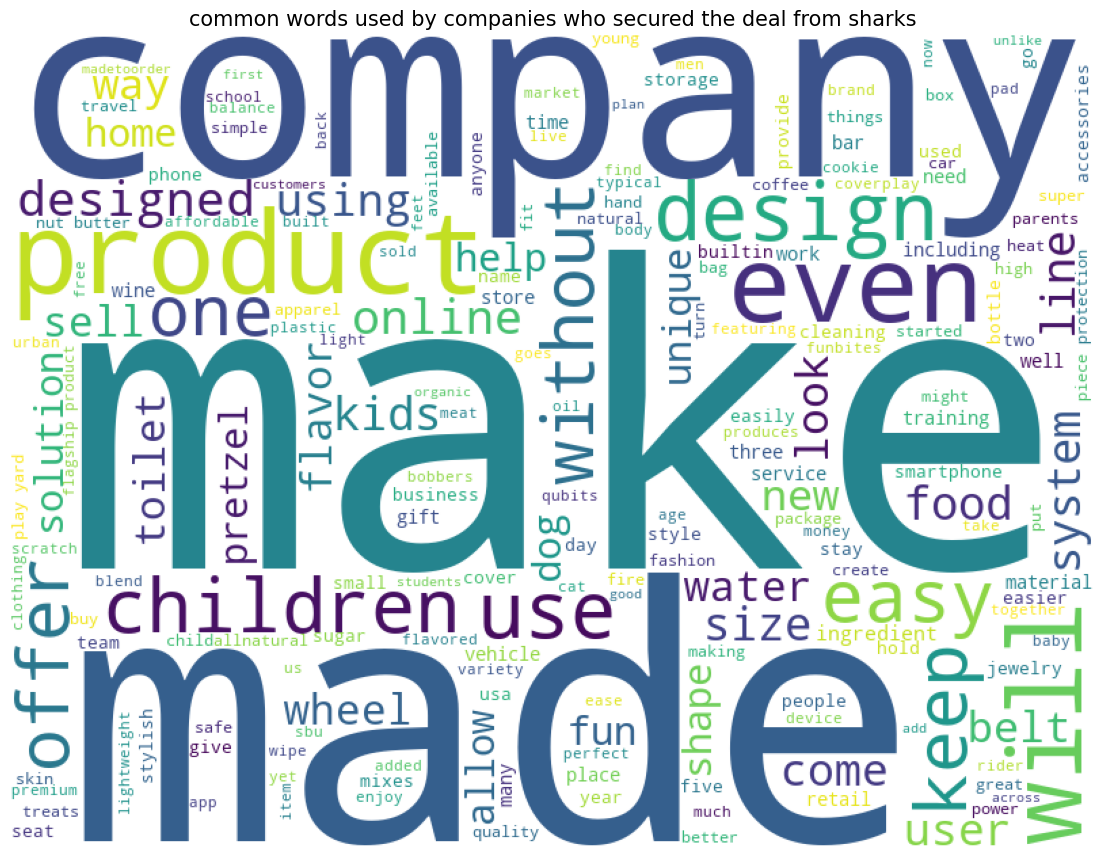

In [262]:
show_wordcloud(deal_secured,"common words used by companies who secured the deal from sharks")

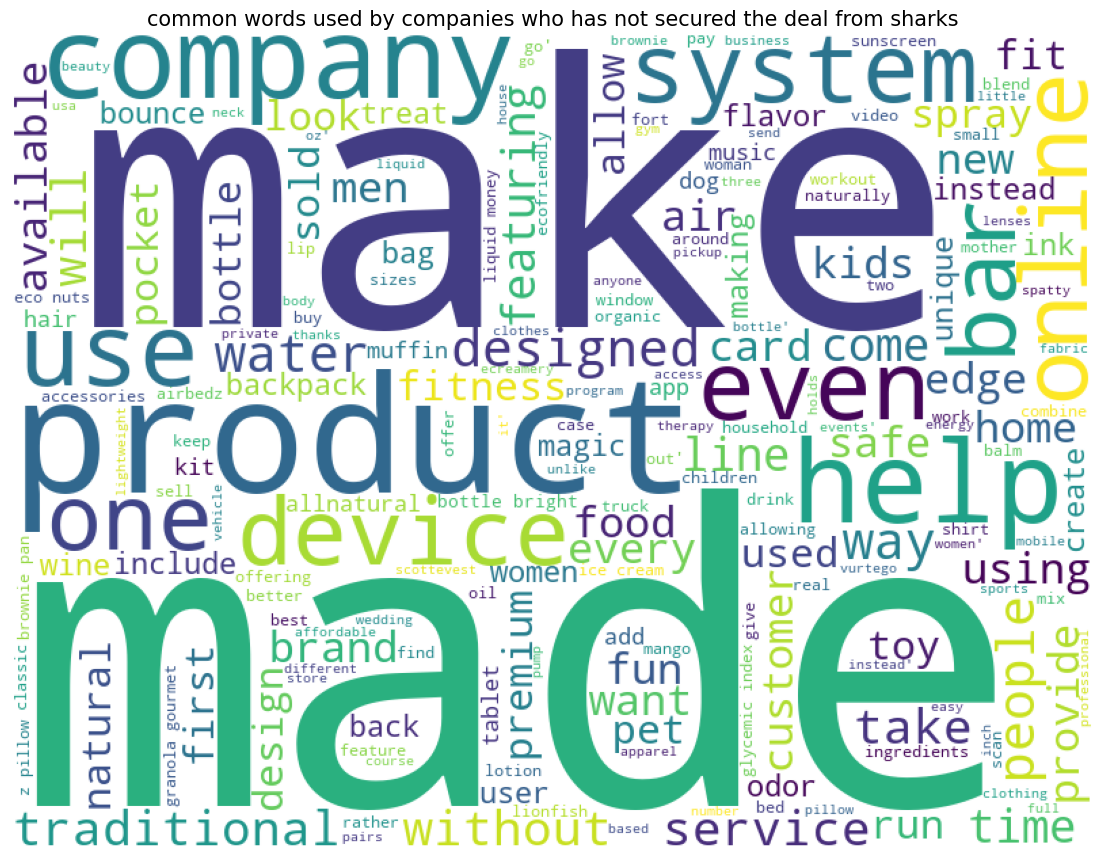

In [263]:
show_wordcloud(deal_notsecured,"common words used by companies who has not secured the deal from sharks")

## Actionable Insights

-


___